In [14]:
import datajoint as dj

import numpy as np
import h5py

from os import listdir

In [2]:
conf_file = "/usr/people/jabae/seungmount/research/Alex/calcium/datajoint/conf/dj_conf_seung.json"
dj.config.load(conf_file)

dj.conn()

Connecting jabae@seungdj01.princeton.edu:3306


DataJoint connection (connected) jabae@seungdj01.princeton.edu:3306

In [7]:
from e2198_tables import *

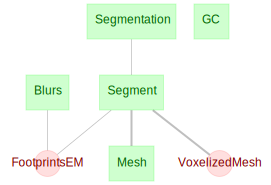

In [16]:
dj.ERD(e2198)

### Ganglion cells

### Soma segmentation

In [9]:
segmentation = {"segmentation": 1,
               "timestamp": "2016-05-10 00:00:00"}
Segmentation().insert1(segmentation, skip_duplicates=True)

In [10]:
Segmentation()

segmentation,timestamp
1,2016-05-10 00:00:00


### Segments

In [12]:
mesh_dir = "/usr/people/jabae/Documents/e2198_mesh/"
mesh_files = listdir(mesh_dir)

ver = 1
seg_array = np.zeros((len(mesh_files),2), dtype="uint64")
seg_array[:,0] = ver
for i in range(len(mesh_files)):
    
    f = mesh_files[i]
    seg_id = int(f[:-3])
    
    seg_array[i,1] = seg_id

Segment.insert(seg_array)

In [13]:
Segment()

segmentation,segment_id
1,92
1,432
1,782
1,825
1,1388
1,3077
1,3461
1,3720
1,4227
1,4300


### Meshes

In [17]:
mesh_dir = "/usr/people/jabae/Documents/e2198_mesh/"
mesh_files = listdir(mesh_dir)

ver = 1

for i in range(len(mesh_files)):
    
    mesh_file = mesh_files[i]
    seg_id = int(mesh_file[:-3])
    
    f = h5py.File(mesh_dir+mesh_file, "r")
    v = f["vertices"][()]
    t = f["faces"][()].reshape((-1,3))
    
    n_v = v.shape[0]
    n_t = t.shape[0]
    f.close()
    
    data = {"segmentation": ver,
           "segment_id": seg_id,
           "n_vertices": n_v,
           "n_triangles": n_t,
           "vertices": v,
           "triangles": t}
    Mesh().insert1(data, skip_duplicates=True)

In [18]:
Mesh()

segmentation,segment_id,n_vertices,n_triangles,vertices,triangles
1,92,910,1808,=BLOB=,=BLOB=
1,432,1080,2156,=BLOB=,=BLOB=
1,782,1585,3166,=BLOB=,=BLOB=
1,825,2790,5564,=BLOB=,=BLOB=
1,1388,1051,2098,=BLOB=,=BLOB=
1,3077,2231,3974,=BLOB=,=BLOB=
1,3461,339,674,=BLOB=,=BLOB=
1,3720,1319,2634,=BLOB=,=BLOB=
1,4227,367,730,=BLOB=,=BLOB=
1,4300,1965,3902,=BLOB=,=BLOB=


In [4]:
VoxelizedMesh()

segmentation,segment_id,n_fragments,n_voxels,n_vertices,n_faces,indices
185,648518346341351441,1,661,28781,57162,=BLOB=
185,648518346341351458,1,540,17290,34404,=BLOB=
185,648518346341351467,1,935,28754,57350,=BLOB=
185,648518346341351491,1,1592,65512,130474,=BLOB=
185,648518346341351495,1,123,4826,9640,=BLOB=
185,648518346341351496,1,542,14848,29612,=BLOB=
185,648518346341351497,1,192,6254,12458,=BLOB=
185,648518346341351498,1,155,3851,7682,=BLOB=
185,648518346341351500,1,184,6161,12264,=BLOB=
185,648518346341351501,1,152,4144,8278,=BLOB=


In [5]:
FootprintsEM()

segmentation,segment_id,version version number,n_voxels number of voxels,"idx_value M*2 matrix, [idx, value]"
185,648518346341351441,2,965,=BLOB=
185,648518346341351458,2,648,=BLOB=
185,648518346341351467,2,1290,=BLOB=
185,648518346341351491,2,1786,=BLOB=
185,648518346341351495,2,166,=BLOB=
185,648518346341351496,2,1149,=BLOB=
185,648518346341351497,2,395,=BLOB=
185,648518346341351498,2,335,=BLOB=
185,648518346341351500,2,287,=BLOB=
185,648518346341351501,2,314,=BLOB=


In [5]:
Blurs()

version version number,zblur gaussian width in z direction,"hash a hash value for uniquely define this configuration key.hash = sum(prod(key.zvals,2)) *key.zblur;",zvals m* n matrix determing the z values
1,8,75884056,=BLOB=
2,8,75921632,=BLOB=
